In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [147]:
results = pd.read_csv(r"C:\Users\ryan-\Desktop\premier-league-matches.csv")

In [148]:

results.head()
results.Season_End_Year = results.Season_End_Year.astype('category')
results.FTR = results.FTR.astype('category')
results.dtypes

Season_End_Year    category
Wk                    int64
Date                 object
Home                 object
HomeGoals             int64
AwayGoals             int64
Away                 object
FTR                category
dtype: object

In [149]:
results.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [150]:
away_results = results[['Season_End_Year', 'Away', 'FTR']]
away_results['FTR'] = away_results.FTR.cat.rename_categories({'A':'W', 'H':'L'})
away_results = away_results.rename(columns = {'Away': 'Team', 'Season_End_Year':'away_results'})
away_records = away_results.groupby(['Team', 'FTR'], observed= False).count()
away_records['away_results_perc'] = round((away_records.away_results/away_records['away_results'].groupby('Team').sum())*100, 2)
away_records.head()

away_results  away_results_perc
Team        FTR                                 
Arsenal     W             263              44.20
            D             156              26.22
            L             176              29.58
Aston Villa W             152              28.25
            D             150              27.88

In [151]:
home_results = results[['Season_End_Year', 'Home', 'FTR']]
home_results['FTR'] = home_results.FTR.cat.rename_categories({'A':'L', 'H':'W'})
home_results = home_results.rename(columns = {'Home': 'Team', 'Season_End_Year':'home_results'})
home_records = home_results.groupby(['Team', 'FTR'], observed = False).count()
home_records['home_results_perc'] = round((home_records.home_results/home_records['home_results'].groupby('Team').sum())*100, 2)
home_records.head()

home_results  home_results_perc
Team        FTR                                 
Arsenal     L              79              13.28
            D             134              22.52
            W             382              64.20
Aston Villa L             165              30.67
            D             153              28.44

In [152]:
merged_records = pd.concat([home_records, away_records], axis=1)
merged_records.head()

home_results  home_results_perc  away_results  \
Team        FTR                                                  
Arsenal     L              79              13.28           176   
            D             134              22.52           156   
            W             382              64.20           263   
Aston Villa L             165              30.67           236   
            D             153              28.44           150   

                 away_results_perc  
Team        FTR                     
Arsenal     L                29.58  
            D                26.22  
            W                44.20  
Aston Villa L                43.87  
            D                27.88

In [153]:
merged_records['combined_results'] = merged_records.home_results + merged_records.away_results
merged_records['combined_results_perc'] = round((merged_records.home_results_perc + merged_records.away_results_perc)/2, 2)
merged_records = merged_records.reset_index()
merged_records = merged_records.rename(columns={'FTR':'result', 'Team': 'team'})
merged_records.head()

,team,result,home_results,home_results_perc,away_results,away_results_perc,combined_results,combined_results_perc
0,Arsenal,L,79,13.28,176,29.58,255,21.43
1,Arsenal,D,134,22.52,156,26.22,290,24.37
2,Arsenal,W,382,64.20,263,44.20,645,54.20
3,Aston Villa,L,165,30.67,236,43.87,401,37.27
4,Aston Villa,D,153,28.44,150,27.88,303,28.16


In [154]:
win_percs = merged_records[merged_records.result == 'W']
win_percs = win_percs.reset_index(drop=True)
win_percs = win_percs.drop(columns=['result'])

#Export to CSV for analysis in Tableau
win_percs.to_csv(r"C:\Users\ryan-\Desktop\premier-league-win-rate.csv", index = False, header = True)

win_percs.head()

,team,home_results,home_results_perc,away_results,away_results_perc,combined_results,combined_results_perc
0,Arsenal,382,64.20,263,44.20,645,54.20
1,Aston Villa,220,40.89,152,28.25,372,34.57
2,Barnsley,7,36.84,3,15.79,10,26.32
3,Birmingham City,50,37.59,23,17.29,73,27.44
4,Blackburn,169,48.56,93,26.72,262,37.64


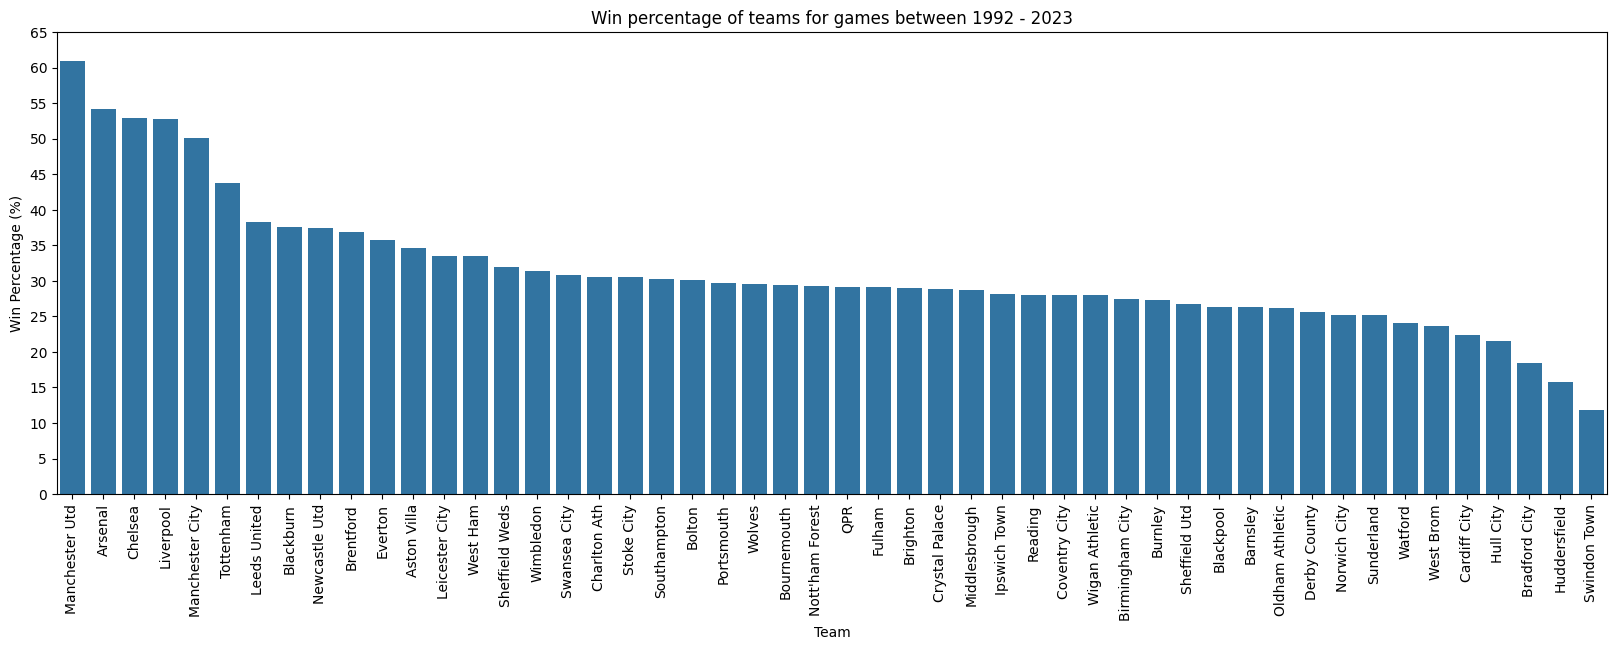

<Figure size 640x480 with 0 Axes>

In [155]:
win_percs = win_percs.sort_values(by='combined_results_perc', ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(x = win_percs.team, y = win_percs.combined_results_perc)
plt.xticks(rotation = 90)
plt.yticks(range(0,  70, 5))
plt.ylabel('Win Percentage (%)')
plt.xlabel('Team')
plt.title('Win percentage of teams for games between 1992 - 2023')
plt.show()
plt.clf()

In [156]:
home_goals = results[['Home', 'HomeGoals']]
home_goals = home_goals.groupby('Home').sum()
home_games = results[['Home', 'HomeGoals']]
home_games = home_games.groupby('Home').count()
home_games = home_games.sort_values(by = 'Home', ascending = True)
home_goals = home_goals.sort_values(by = 'Home', ascending = True)
home_games = home_games.rename(columns={'HomeGoals': 'num_home_games'})
home_games = pd.concat([home_games, home_goals], axis=1)
home_games = home_games.rename(columns={'HomeGoals': 'num_home_goals'})
home_games['home_gpg'] = round(home_games.num_home_goals / home_games.num_home_games, 3)
home_games.head()


,num_home_games,num_home_goals,home_gpg
Home,,,
Arsenal,595,1207,2.029
Aston Villa,538,717,1.333
Barnsley,19,25,1.316
Birmingham City,133,162,1.218
Blackburn,348,545,1.566


In [157]:
away_goals = results[['Away', 'AwayGoals']]
away_goals = away_goals.groupby('Away').sum()
away_games = results[['Away', 'AwayGoals']]
away_games = away_games.groupby('Away').count()
away_games = away_games.sort_values(by = 'Away', ascending = True)
away_goals = away_goals.sort_values(by = 'Away', ascending = True)
away_games = away_games.rename(columns={'AwayGoals': 'num_away_games'})
away_games = pd.concat([away_games, away_goals], axis=1)
away_games = away_games.rename(columns={'AwayGoals': 'num_away_goals'})
away_games['away_gpg'] = round(away_games.num_away_goals / away_games.num_away_games, 3)
away_games.head()

,num_away_games,num_away_goals,away_gpg
Away,,,
Arsenal,595,898,1.509
Aston Villa,538,599,1.113
Barnsley,19,12,0.632
Birmingham City,133,111,0.835
Blackburn,348,382,1.098


In [158]:
goals = pd.concat([home_games, away_games], axis = 1)
goals['total_num_games'] = goals.num_home_games + goals.num_away_games
goals['total_goals'] = goals.num_home_goals + goals.num_away_goals
goals['total_gpg'] = round(goals.total_goals / goals.total_num_games, 3)



goals = goals.sort_values(by = 'total_gpg', ascending= False)
goals = goals.reset_index()
goals = goals.rename(columns={'index': 'team'})
#Export to CSV for analysis in Tableau
goals.to_csv(r"C:\Users\ryan-\Desktop\premier-league-gpg.csv", index = False, header = True)
goals.head()

,team,num_home_games,num_home_goals,home_gpg,num_away_games,num_away_goals,away_gpg,total_num_games,total_goals,total_gpg
0,Manchester Utd,595,1250,2.101,595,993,1.669,1190,2243,1.885
1,Arsenal,595,1207,2.029,595,898,1.509,1190,2105,1.769
2,Liverpool,595,1202,2.020,595,894,1.503,1190,2096,1.761
3,Manchester City,500,1017,2.034,500,735,1.470,1000,1752,1.752
4,Chelsea,595,1141,1.918,595,870,1.462,1190,2011,1.690


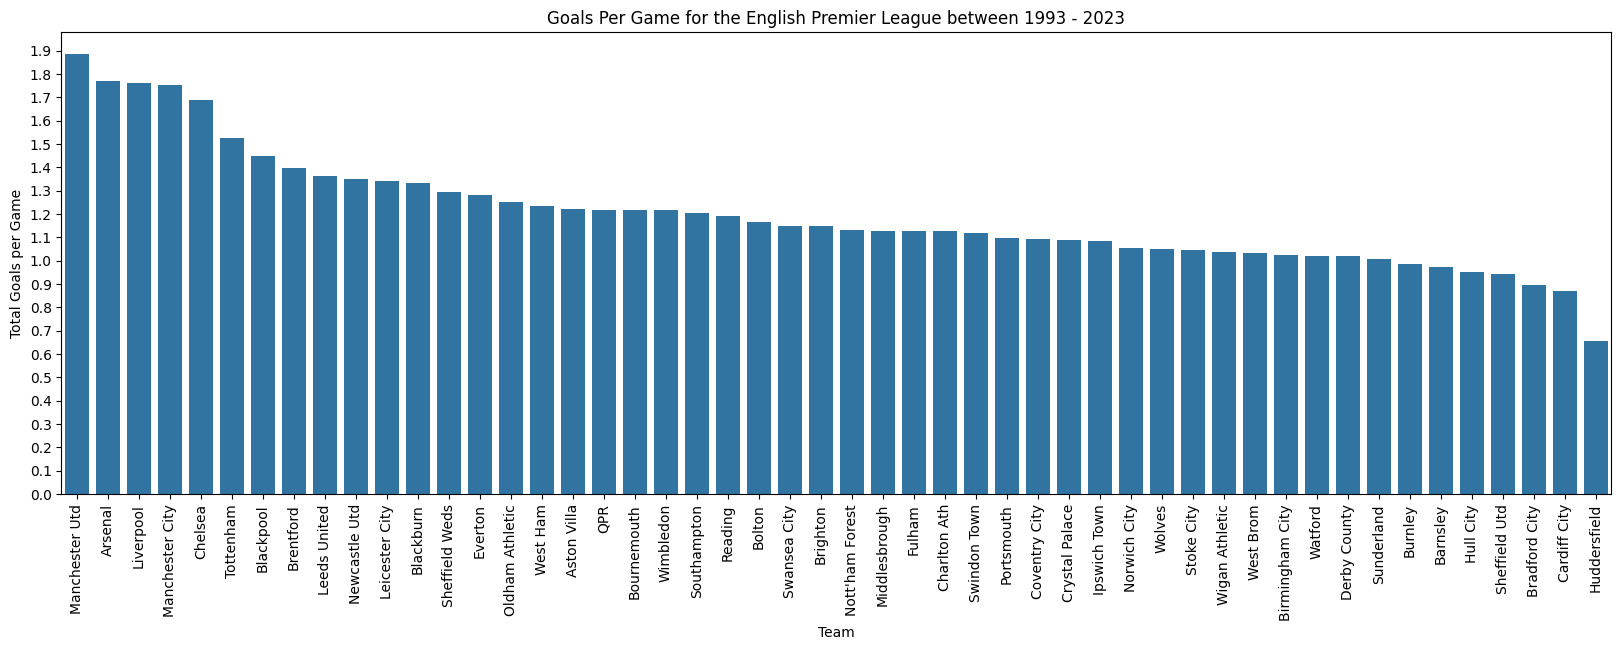

<Figure size 640x480 with 0 Axes>

In [159]:
plt.figure(figsize=(20, 6))
sns.barplot(x = goals.team, y = goals.total_gpg)
plt.xticks(rotation = 90)
plt.title('Goals Per Game for the English Premier League between 1993 - 2023')
plt.ylabel('Total Goals per Game')
plt.xlabel('Team')
plt.yticks(np.arange(0, 2, 0.1))
plt.show()
plt.clf()

In [160]:
#Function to run through a for loop in another function to concatenate data

def year_tracker(team):
    #Designate desired data for Home results
    temp_df_home = results[['Season_End_Year', 'Home', 'HomeGoals','AwayGoals', 'FTR']]
    temp_df_home = temp_df_home[temp_df_home.Home == team]
    
    #Calculate win percentage by season (home results)
    temp_win_perc = temp_df_home[['Home','Season_End_Year', 'FTR', 'HomeGoals']]
    temp_win_perc['FTR'] = temp_win_perc.FTR.cat.rename_categories({'A':'hL', 'H':'hW', 'D':'hD'})
    temp_win_perc = temp_win_perc.groupby(['Season_End_Year', 'FTR'], observed= False).count()
    temp_win_perc = temp_win_perc.reset_index()
    temp_win_perc = temp_win_perc.pivot(columns = 'FTR', index = 'Season_End_Year', values = 'HomeGoals')
    temp_win_perc = temp_win_perc.reset_index()
    temp_win_perc = temp_win_perc.rename(columns = {'Season_End_Year': 'year5'})
    temp_win_perc['home_win_perc'] = round((temp_win_perc.hW/(temp_win_perc.hW + temp_win_perc.hD + temp_win_perc.hL)*100), 2)
    
    #Calculate goals scored per season (home results)
    temp_goals = temp_df_home[['Season_End_Year', 'HomeGoals']]
    temp_goals = temp_goals.groupby('Season_End_Year', observed= False).sum()
    temp_goals = temp_goals.reset_index()
    temp_goals = temp_goals.rename(columns = {'Season_End_Year': 'year2', 'HomeGoals': 'home_goals'})
    
    #Calculate goals against per season (home results)
    temp_conc = temp_df_home[['Season_End_Year', 'AwayGoals']]
    temp_conc = temp_conc.groupby('Season_End_Year', observed = False).sum()
    temp_conc = temp_conc.reset_index()
    temp_conc = temp_conc.rename(columns={'Season_End_Year': 'year6', 'AwayGoals': 'home_goals_conceded'})
    
    #Designate desired data for away results
    temp_df_away = results[['Season_End_Year', 'Away', 'AwayGoals', 'HomeGoals', 'FTR']]
    temp_df_away = temp_df_away[temp_df_away.Away == team]
    
    #Calculate win percentage by season away results
    temp_win_perc2 = temp_df_away[['Season_End_Year', 'FTR', 'AwayGoals']]
    temp_win_perc2['FTR'] = temp_win_perc2.FTR.cat.rename_categories({'A':'aW', 'H':'aL', 'D':'aD'})
    temp_win_perc2 = temp_win_perc2.groupby(['Season_End_Year', 'FTR'], observed= False).count()
    temp_win_perc2 = temp_win_perc2.reset_index()
    temp_win_perc2 = temp_win_perc2.pivot(columns = 'FTR', index = 'Season_End_Year', values = 'AwayGoals')
    temp_win_perc2 = temp_win_perc2.reset_index()
    temp_win_perc2 = temp_win_perc2.rename(columns = {'Season_End_Year': 'year3'})
    temp_win_perc2['away_win_perc'] = round((temp_win_perc2.aW/(temp_win_perc2.aW + temp_win_perc2.aD + temp_win_perc2.aL)*100), 2)
    
    #Calculate goals per season away results
    temp_goals2 = temp_df_away[['Season_End_Year', 'AwayGoals']]
    temp_goals2 = temp_goals2.groupby('Season_End_Year', observed= False).sum()
    temp_goals2 = temp_goals2.reset_index()
    temp_goals2 = temp_goals2.rename(columns = {'Season_End_Year': 'year4', 'AwayGoals': 'away_goals'})
    
    #Calculate goals against per season away results
    temp_conc2 = temp_df_away[['Season_End_Year', 'HomeGoals']]
    temp_conc2 = temp_conc2.groupby('Season_End_Year', observed = False).sum()
    temp_conc2 = temp_conc2.reset_index()
    temp_conc2 = temp_conc2.rename(columns={'Season_End_Year': 'year7', 'HomeGoals': 'away_goals_conceded'})
    
    #Add team name to each row 
    year_range = list(range(1993, 2024, 1))
    team_list = [team for i in range(len(year_range))]
    year_range = dict(zip(year_range, team_list))
    temp_df = pd.Series(year_range)
    temp_df = temp_df.reset_index()
    temp_df = temp_df.rename(columns={'index': 'year', 0: 'team'})
    
    #Concata all temps for output
    output_df = pd.concat([temp_df, temp_win_perc, temp_goals, temp_conc, temp_win_perc2, temp_goals2, temp_conc2], axis=1)
    output_df = output_df.drop(columns = ['year2', 'year3', 'year4', 'year5', 'year6', 'year7'])
    output_df = output_df[['year','team','hW','hD','hL', 'home_win_perc','home_goals', 'home_goals_conceded','aW','aD','aL', 'away_win_perc','away_goals', 'away_goals_conceded']]
    output_df['tW'] = output_df.hW + output_df.aW
    output_df['tD'] = output_df.hD + output_df.aD
    output_df['tL'] = output_df.hL + output_df.aL
    output_df['total_win_perc'] = round((output_df.tW/(output_df.tW + output_df.tD + output_df.tL)*100), 2)
    output_df['total_goals'] = output_df.home_goals + output_df.away_goals
    output_df['total_conceded'] = output_df.home_goals_conceded + output_df.away_goals_conceded
    output_df['goal_difference'] = output_df.total_goals - output_df.total_conceded
    
    return output_df


In [161]:
#Function for creating table to concatenate 

def years_stats(input_list):
    output_df = pd.DataFrame()
    for i in input_list:
        if output_df.empty:
            output_df = year_tracker(i)
        
        else:
            temp_df = year_tracker(i)
            output_df = pd.concat([output_df, temp_df], axis = 0)
    print(len(output_df))
        
    output_df = output_df.reset_index()
    output_df = output_df.drop(columns= ['index'])
    
    return output_df


In [162]:
#Creating a list of teams that have played more then 1100 games
team_list = list(goals[goals.total_num_games > 1100].team)

#Pulling stats for the above list
long_term_teams = years_stats(team_list)

#Export to CSV for analysis in Tableau
long_term_teams.to_csv(r"C:\Users\ryan-\Desktop\premier-league-long-term-teams.csv", index = False, header = True)
long_term_teams.head()


186


,year,team,hW,hD,hL,home_win_perc,home_goals,home_goals_conceded,aW,aD,...,away_win_perc,away_goals,away_goals_conceded,tW,tD,tL,total_win_perc,total_goals,total_conceded,goal_difference
0,1993,Manchester Utd,14,5,2,66.67,39,14,10,7,...,47.62,28,17,24,12,6,57.14,67,31,36
1,1994,Manchester Utd,14,6,1,66.67,39,13,13,5,...,61.90,41,25,27,11,4,64.29,80,38,42
2,1995,Manchester Utd,16,4,1,76.19,42,4,10,6,...,47.62,35,24,26,10,6,61.90,77,28,49
3,1996,Manchester Utd,15,4,0,78.95,36,9,10,3,...,52.63,37,26,25,7,6,65.79,73,35,38
4,1997,Manchester Utd,12,5,2,63.16,38,17,9,7,...,47.37,38,27,21,12,5,55.26,76,44,32


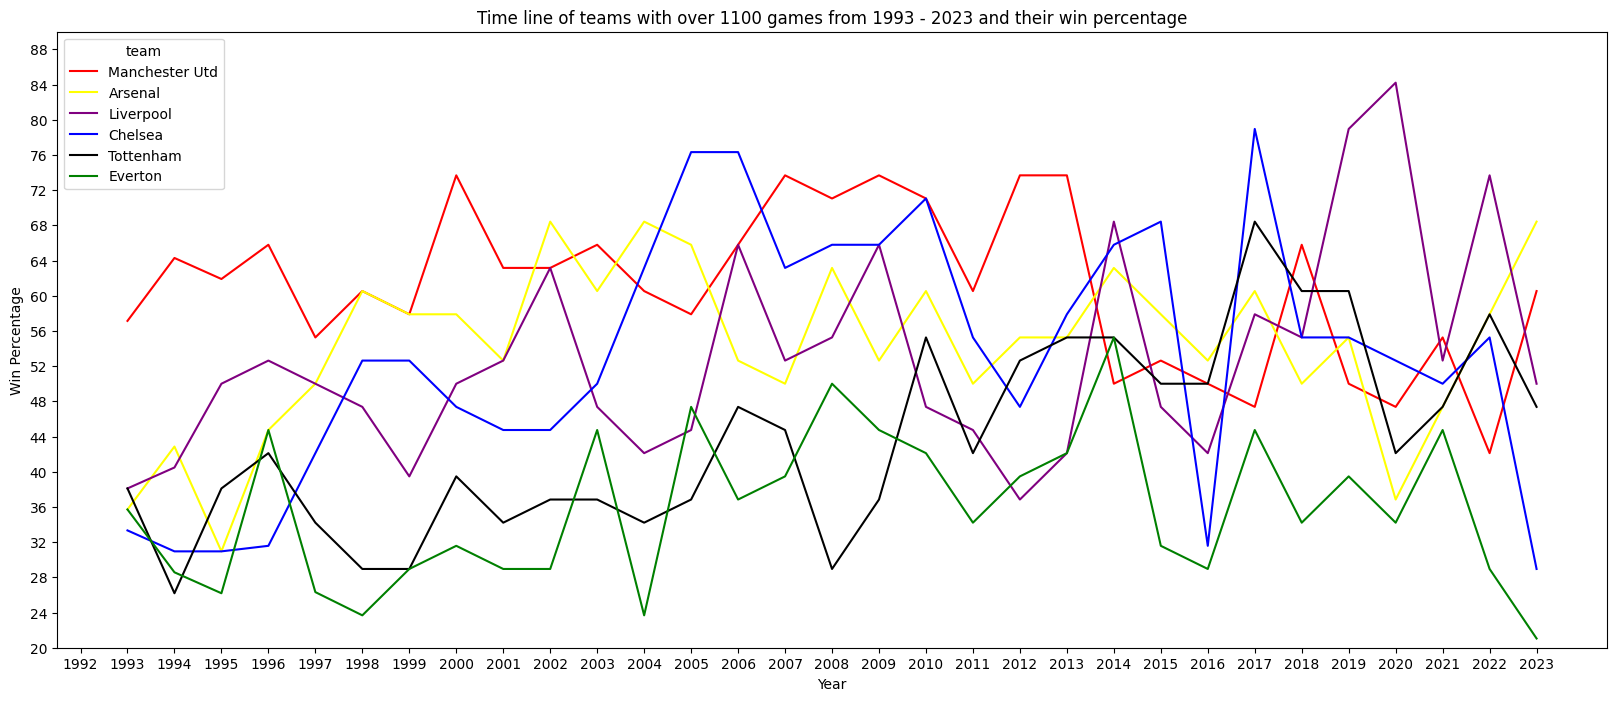

In [163]:
plt.figure(figsize=(20, 8))
sns.lineplot(x = long_term_teams.year, y = long_term_teams.total_win_perc, hue = long_term_teams.team, palette=['red', 'yellow', 'purple', 'blue', 'black', 'green'])
plt.ylabel('Win Percentage')
plt.xlabel('Year')
plt.ylim(20, 90)
plt.yticks(range(20, 90, 4))
plt.xticks(range(1992, 2024, 1))
plt.title('Time line of teams with over 1100 games from 1993 - 2023 and their win percentage')
plt.show()

In [164]:
#Importing data researched and created in excel, exported to .csv and left a little unclean

league_df = pd.read_csv(r"C:\Users\ryan-\Desktop\premier-league-winners-relegation-topscorers.csv")

year_list = []
for season in league_df.Season:
    temp = season.split("-")[1:]
    if int(temp[0]) > 90 and int(temp[0]) < 1000:
        temp = '19' + temp[0]
    elif int(temp[0]) < 90:
        temp = '20' + temp[0]
    year_list.append(temp)

league_df.Season = year_list
league_df = league_df.rename(columns={'Season': 'year', 'Champions': 'champions', 'Relegated': 'relegated', 'Top scorer(s)': 'top_scorer', 'Tops scorer(s) team': 'top_scorer_team', 'Goals in PL': 'goals_scored'})

relegated_list = []
top_scorer_list = []
top_scorer_team_list = []
for index, row in league_df.iterrows():
    #splitting relegated teams column
    temp = league_df.iloc[index].relegated.split('\n')
    relegated_list.append(temp)
    
    #splitting top scorers column
    temp2 = league_df.iloc[index].top_scorer.split(',\n')
    top_scorer_list.append(temp2)
    
    #splitting top scorer team column
    temp3 = league_df.iloc[index].top_scorer_team.split(',')
    top_scorer_team_list.append(temp3)

rele_1, rele_2, rele_3 = [team[0] for team in relegated_list], [team[1] for team in relegated_list], [team[2] for team in relegated_list]
league_df['relegated_1'], league_df['relegated_2'], league_df['relegated_3'] = rele_1, rele_2, rele_3
league_df = league_df.drop(columns=['relegated'])

#created seperate lists for each column
top_1, top_2, top_3, team_1, team_2, team_3 = [], [], [], [], [], []
for player, team in list(zip(top_scorer_list, top_scorer_team_list)):
    if len(player) == 1:
        top_1.append(player[0]), team_1.append(team[0])
        top_2.append(np.nan), team_2.append(np.nan)
        top_3.append(np.nan), team_3.append(np.nan)
    elif len(player) == 2:
        top_1.append(player[0]), team_1.append(team[0])
        top_2.append(player[1]), team_2.append(team[1])
        top_3.append(np.nan), team_3.append(np.nan)
    else:
        top_1.append(player[0]), team_1.append(team[0])
        top_2.append(player[1]), team_2.append(team[1])
        top_3.append(player[2]), team_3.append(team[2])

#adding column to league_df dataframe      
league_df['top_scorer_1'], league_df['top_scorer_2'], league_df['top_scorer_3'] = top_1, top_2, top_3
league_df['top_scorer_team_1'], league_df['top_scorer_team_2'], league_df['top_scorer_team_3'] = team_1, team_2, team_3
league_df = league_df.drop(columns=['top_scorer', 'top_scorer_team'])
league_df = league_df[['year', 'champions', 'relegated_1', 'relegated_2', 'relegated_3', 'top_scorer_1', 'top_scorer_2', 'top_scorer_3', 'top_scorer_team_1', 'top_scorer_team_2', 'top_scorer_team_3', 'goals_scored']]

#Exporting the created and cleaned dataset to csv for data visualisation
league_df.to_csv(r"C:\Users\ryan-\Desktop\premier-league-champs-rele-top-scorer.csv", index = False, header = True)

league_df.head()

,year,champions,relegated_1,relegated_2,relegated_3,top_scorer_1,top_scorer_2,top_scorer_3,top_scorer_team_1,top_scorer_team_2,top_scorer_team_3,goals_scored
0,1993,Manchester United,Crystal Palace,Middlesbrough,Nottingham Forest,Teddy Sheringham,NaN,NaN,Tottenham Hotspur,NaN,NaN,22
1,1994,Manchester United,Sheffield United,Oldham Athletic,Swindon Town,Andy Cole,NaN,NaN,Newcastle United,NaN,NaN,34
2,1995,Blackburn Rovers,Crystal Palace,Norwich City,Leicester City,Alan Shearer,NaN,NaN,Blackburn Rovers,NaN,NaN,34
3,1996,Manchester United,Manchester City,Queens Park Rangers,Bolton Wanderers,Alan Shearer,NaN,NaN,Blackburn Rovers,NaN,NaN,31
4,1997,Manchester United,Sunderland,Middlesbrough,Nottingham Forest,Alan Shearer,NaN,NaN,Newcastle United,NaN,NaN,25


In [191]:
#Importing the end of season table for each year researched and created in excel, exported to .csv

standings_df = pd.read_csv(r"C:\Users\ryan-\Desktop\premier-league-standings.csv")
standings_df.head()

,Position,1993,Unnamed: 2,1994,Unnamed: 4,1995,Unnamed: 6,1996,Unnamed: 8,1997,...,Unnamed: 54,2020,Unnamed: 56,2021,Unnamed: 58,2022,Unnamed: 60,2023,Unnamed: 62,Unnamed: 63
0,1,MANCHESTER UNITED,84,MANCHESTER UNITED,92,BLACKBURN ROVERS,89,MANCHESTER UNITED,82,MANCHESTER UNITED,...,98,LIVERPOOL,99,MANCHESTER CITY,86,MANCHESTER CITY,93,MANCHESTER CITY,89,NaN
1,2,ASTON VILLA,74,BLACKBURN ROVERS,84,MANCHESTER UNITED,88,NEWCASTLE UNITED,78,NEWCASTLE UNITED,...,97,MANCHESTER CITY,81,MANCHESTER UNITED,74,LIVERPOOL,92,ARSENAL,84,NaN
2,3,NORWICH CITY,72,NEWCASTLE UNITED,77,NOTTINGHAM FOREST,77,LIVERPOOL,71,ARSENAL,...,72,MANCHESTER UNITED,66,LIVERPOOL,69,CHELSEA,74,MANCHESTER UNITED,75,NaN
3,4,BLACKBURN ROVERS,71,ARSENAL,71,LIVERPOOL,74,ASTON VILLA,63,LIVERPOOL,...,71,CHELSEA,66,CHELSEA,67,TOTTENHAM HOTSPUR,71,NEWCASTLE UNITED,71,NaN
4,5,QUEENS PARK RANGERS,63,LEEDS UNITED,70,LEEDS UNITED,73,ARSENAL,63,ASTON VILLA,...,70,LEICESTER CITY,62,LEICESTER CITY,66,ARSENAL,69,LIVERPOOL,67,NaN


In [192]:
#Creating a new table from the standings_df which gives a time line as to where each team finished if they were in the premier league
#if not, the cell is filled with np.nan

teams_list = []
years_list = []
for column in list(standings_df.columns):
    if column[:7] == 'Unnamed':
        standings_df = standings_df.rename(columns={column: 'Points'})
    elif column == 'Position':
        continue
    else:
       
        standings_df[column] = standings_df[column].str.title()
        years_list.append(str(column))
        for i in standings_df[column]:
            if i not in teams_list:
                teams_list.append(i)

              
standings_df = standings_df.iloc[:, :-1]
standings_new = pd.DataFrame(columns = years_list, index = teams_list, data = np.nan)
standings_new = standings_new.reset_index()
standings_new = standings_new.rename(columns={'index': 'team'})
standings_new = standings_new.sort_values(by = 'team', ascending= True)
standings_new = standings_new.reset_index(drop=True)



for year in years_list:
    count = 1
    if isinstance(year, list):
        year = year[0]
    for team in standings_df[year]:
        if count == 21:
            count = 1
        temp_ind = standings_new.index[standings_new.team == team].tolist()
        temp_ind = temp_ind[0]
        standings_new.at[temp_ind, year] = count
        count += 1

standings_new.to_csv(r"C:\Users\ryan-\Desktop\premier-league-season-finishes.csv", index = False, header = True)
standings_new.head()

,team,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afc Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,9.0,12.0,14.0,18.0,NaN,NaN,15.0
1,Arsenal,10.0,4.0,12.0,5.0,3.0,1.0,2.0,2.0,2.0,...,4.0,3.0,2.0,5.0,6.0,5.0,8.0,8.0,5.0,2.0
2,Aston Villa,2.0,10.0,18.0,4.0,5.0,7.0,6.0,6.0,8.0,...,15.0,17.0,20.0,NaN,NaN,NaN,17.0,11.0,14.0,7.0
3,Barnsley,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Birmingham City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
